In [10]:
import rebound
import numpy as np
import pandas as pd
import sys
import os
sys.path.insert(1,'../src')
import run_reb
import tools
import integrate_multi as integrate
import prop_elem
import chaos_indicators

import hard_coded_constants as C

objnum = '68'
import matplotlib.pyplot as plt
from datetime import datetime
begin = datetime.now()

In [8]:
DEEP_df = pd.read_csv('../data/data_files/DEEP.csv')
#print(DEEP_df)

GM_SS = C.SS_GM[0]
AU = 1.496e8
yr = 365*24*60*60
dt = C.dt
GM_new = GM_SS/AU**3*yr**2

obj = DEEP_df.iloc[objnum]
Tps = DEEP_df['Tps'].iloc[objnum]
smas = DEEP_df['smas'].iloc[objnum]
epoch = DEEP_df['epoch'].iloc[objnum]
P = smas**1.5*365*24
M = 2*np.pi*(epoch-Tps)/P

#print(obj)
planet_id = {5: 'jupiter', 6: 'saturn', 7: 'uranus', 8: 'neptune'}


begin = datetime.now()
flag, x, y, z, vx, vy, vz = tools.aei_to_xv(GM=GM_new, a=obj['smas'], e=obj['eccs'], 
                                            inc=obj['incs']/180*np.pi, node=obj['lans']/180*np.pi, 
                                            argperi=obj['aops']/180*np.pi, ma=M)
flag,epoch,sim = run_reb.initialize_simulation_from_sv(planets=list(planet_id.values()),
                                                       des=str(objnum), clones=0, sb=[epoch,x,y,z,vx,vy,vz])
print(datetime.now()-begin)

obj_directory = '../data/Single/'+str(objnum)
os.makedirs(obj_directory, exist_ok=True)
archive_file = os.path.join(obj_directory, "archive_init.bin")
sim.save_to_file(archive_file)

TypeError: Cannot index by location index with a non-integer key

In [9]:
#begin = datetime.now()
integrate.integrate(objname=str(objnum),tmax=1e7,tout=1e2,objtype='Single',arcfile='archive_hires.bin')
#print(datetime.now()-begin)

../data/Single/2014 US277


1

In [14]:
begin = datetime.now()
prop_vals = prop_elem.prop_calc(objname=str(objnum), filename='Single')
print(datetime.now()-begin)


begin = datetime.now()
chaos_indicators.integrate_chaos(objname=str(objnum), tmax1=5e4, tout1=5e2,
                                 tmax2=1e6, tout2=2e4, objtype='Single')
print(datetime.now()-begin)
begin = datetime.now()
ci = chaos_indicators.calc_chaos(objname=str(objnum),objtype='Single',prop_vals=prop_vals)
print(datetime.now()-begin)



../data/Single/2014 US277/archive.bin
0:00:09.166644
short made
True
2014 US277
0:00:14.273448
0:00:19.472008


In [12]:
begin = datetime.now()
flag, a, e, inc, lan, aop, M, t = tools.read_sa_for_sbody(sbody = str(objnum), archivefile='../data/Single/'+str(objnum)+'/archive.bin',nclones=10,tmin=0.,tmax=1e8)
#flag, a, e, inc, lan, aop, M, t = tools.read_sa_for_sbody(sbody = str(obj), archivefile='../data/Single/68/archive.bin',nclones=10,tmin=0.,tmax=1e8)
print(datetime.now()-begin)

0:00:27.082345


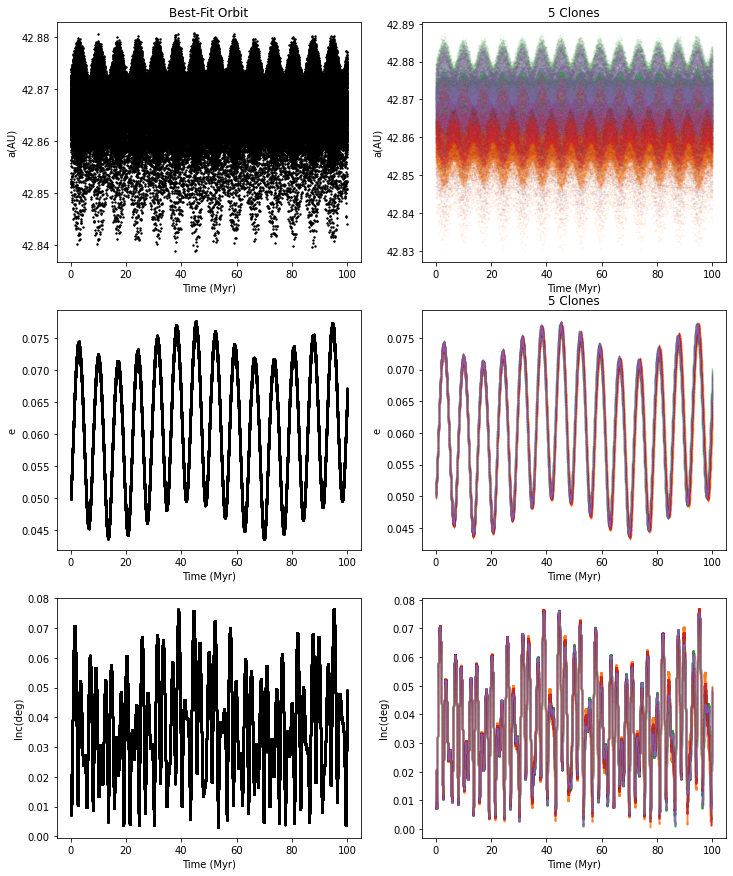

In [14]:
fig,ax = plt.subplots(3,2,figsize=(12,15))
cnum = 6
time = t
for num in range(1,cnum):
    if num == 5:
        alpha = 0.05
    else:
        alpha=0.05
    ax[0,1].scatter(t/1e6,a[num],s=1,alpha=alpha)
    ax[0,1].set_title('5 Clones')
    ax[0,1].set_ylabel('a(AU)')
    ax[0,1].set_xlabel('Time (Myr)')
    ax[1,1].scatter(time/1e6,e[num],s=0.5,alpha=alpha)
    ax[1,1].set_ylabel('e')
    ax[1,1].set_title('5 Clones')
    ax[1,1].set_xlabel('Time (Myr)')
    ax[2,1].scatter(time/1e6,inc[num],s=1,alpha=alpha)
    ax[2,1].set_ylabel('Inc(deg)')
    ax[2,1].set_xlabel('Time (Myr)')
ax[0,0].scatter(time/1e6,a[0],s=2,alpha=1,c='k')
ax[0,0].set_ylabel('a(AU)')
ax[0,0].set_title('Best-Fit Orbit')
ax[0,0].set_xlabel('Time (Myr)')
ax[1,0].scatter(time/1e6,e[0],s=2,alpha=1,c='k')
ax[1,0].set_ylabel('e')
ax[1,0].set_xlabel('Time (Myr)')
ax[2,0].scatter(time/1e6,inc[0],s=2,alpha=1,c='k')
ax[2,0].set_ylabel('Inc(deg)')
ax[2,0].set_xlabel('Time (Myr)')
plt.show() 

0:00:25.136818


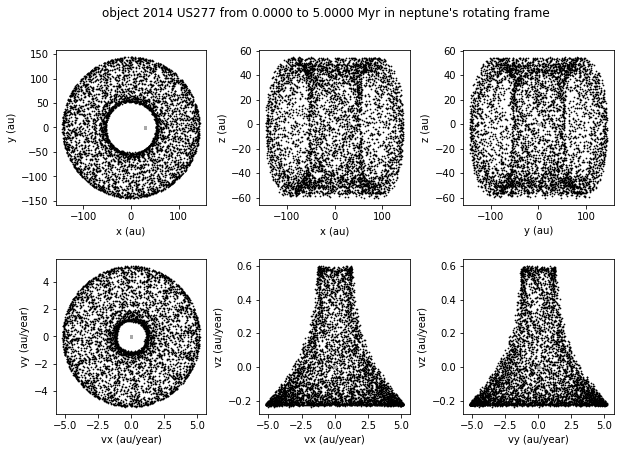

In [31]:
import sys
import os
sys.path.insert(1,'../src')
import sbdynt as sbd
import rebound
import numpy as np
import pandas as pd

import run_reb
import tools
import integrate_multi as integrate
import prop_elem
import chaos_indicators

import hard_coded_constants as C

import matplotlib.pyplot as plt

begin = datetime.now()
sbd.calc_and_plot_rotating_frame(sbody=str(objnum),planet = 'neptune', 
                                 archivefile='../data/Single/'+str(objnum)+'/archive.bin', nclones=0,
                                 figfile='../data/Single/'+str(objnum)+'/Rot_frame.png',bfps=.5,cps=0.5,calpha=0.5,
                                 tmin=0, tmax=5e6)
print(datetime.now()-begin)

(1, <Figure size 720x720 with 6 Axes>)

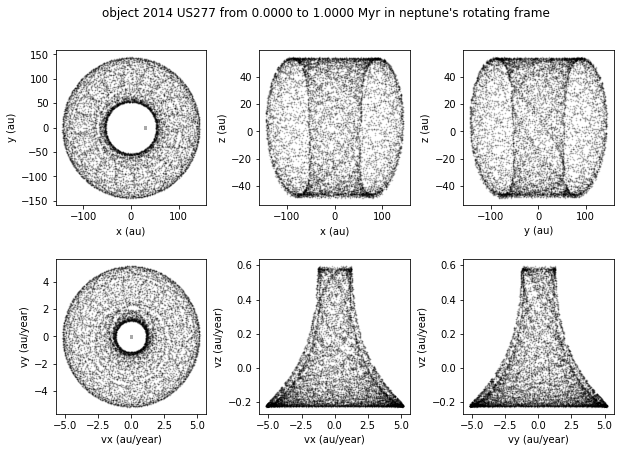

In [7]:
import sys
import os
sys.path.insert(1,'../src')
import sbdynt as sbd
import rebound
import numpy as np
import pandas as pd

import run_reb
import tools
import integrate_multi as integrate
import prop_elem
import chaos_indicators

import hard_coded_constants as C

objnum = '2014 US277'
import matplotlib.pyplot as plt

#begin = datetime.now()
sbd.calc_and_plot_rotating_frame(sbody='2014 US277',planet = 'neptune', 
                                 archivefile='../data/Single/2014 US277/archive_hires.bin', nclones=0,
                                 figfile='../data/2014 US277_rot.png',bfps=0.5,cps=0.5,calpha=0.5,
                                 tmin=0, tmax=1e6)
#print(datetime.now()-begin)